🟡 Welcome to the Gold Price Prediction System

Choose a prediction mode:
1️⃣ Predict gold price using SPX, USO, SLV, and EUR/USD (Linear Regression)
2️⃣ Predict gold price for a specific future date (ARIMA time-series)
3️⃣ Predict whether price will Increase or Decrease (Logistic Regression)

Enter your choice (1, 2, or 3): 2

📗 Selected: ARIMA Time-Series Model (2015–2025 dataset)

✅ Dataset Loaded Successfully: (2848, 6)
🔍 Finding best ARIMA parameters...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.51 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=43660.526, Time=0.26 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=42713.845, Time=0.92 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=43658.527, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=42413.621, Time=1.92 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=42271.941, Time=2.33 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : 

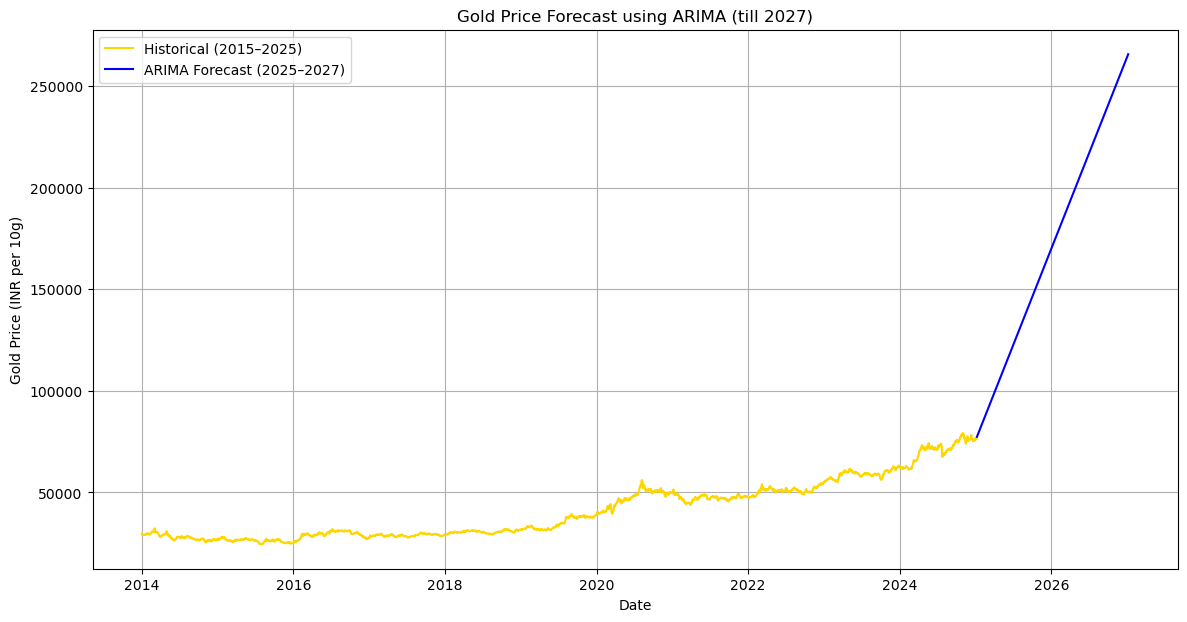


Enter a future date (between 2025–2027) to predict gold price:
Date (YYYY-MM-DD): 2025-11-06

💰 Predicted Gold Price on 2025-11-06: ₹155650.38


In [3]:
# -------------------------------------------------------------
# 🪙 GOLD PRICE HYBRID PREDICTION SYSTEM
# -------------------------------------------------------------
# Combines:
# 1️⃣ Linear Regression (Market Indicators)
# 2️⃣ ARIMA (Time Series Forecast)
# 3️⃣ Logistic Regression (Trend Direction Prediction)
# -------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------------------
# Step 1: Ask User for Prediction Type
# -------------------------------------------------------------
print("🟡 Welcome to the Gold Price Prediction System\n")
print("Choose a prediction mode:")
print("1️⃣ Predict gold price using SPX, USO, SLV, and EUR/USD (Linear Regression)")
print("2️⃣ Predict gold price for a specific future date (ARIMA time-series)")
print("3️⃣ Predict whether price will Increase or Decrease (Logistic Regression)")
choice = input("\nEnter your choice (1, 2, or 3): ")

# -------------------------------------------------------------
# -------------- OPTION 1: LINEAR REGRESSION ------------------
# -------------------------------------------------------------
if choice == "1":
    print("\n📘 Selected: Linear Regression Model (2008–2018 dataset)\n")

    # Step 1: Load Dataset
    data = pd.read_csv("../data/gold_price_data.csv")
    data.dropna(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')

    print("✅ Dataset Loaded Successfully!")

    # Step 2: Define Features and Target
    X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
    y = data['GLD']

    # Step 3: Split and Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Step 4: Predictions and Evaluation
    y_pred = lr.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("\n📊 Linear Regression Model Evaluation")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")

    # Step 5: Scatter Plot (Actual vs Predicted)
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, color='orange')
    plt.xlabel("Actual Gold Prices")
    plt.ylabel("Predicted Gold Prices")
    plt.title("Actual vs Predicted Gold Prices (Linear Regression)")
    plt.grid(True)
    plt.show()

    # Step 6: Predict using User Input
    print("\nEnter market indicator values to predict gold price:")
    spx = float(input("SPX: "))
    uso = float(input("USO: "))
    slv = float(input("SLV: "))
    eur = float(input("EUR/USD: "))

    sample_input = np.array([[spx, uso, slv, eur]])
    predicted_price = lr.predict(sample_input)
    print(f"\n💰 Predicted Gold Price based on input values: ₹{predicted_price[0]:.2f}")

# -------------------------------------------------------------
# ------------------- OPTION 2: ARIMA MODEL -------------------
# -------------------------------------------------------------
elif choice == "2":
    print("\n📗 Selected: ARIMA Time-Series Model (2015–2025 dataset)\n")

    # Step 1: Load Dataset
    data = pd.read_csv('../data/daily_gold_2015_2025.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()

    print("✅ Dataset Loaded Successfully:", data.shape)

    # Step 2: Fit ARIMA
    print("🔍 Finding best ARIMA parameters...")
    auto_model = auto_arima(data['Price'], seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
    print("\n✅ Best ARIMA order found:", auto_model.order)

    model = ARIMA(data['Price'], order=auto_model.order)
    model_fit = model.fit()

    # Step 3: Forecast till 2027
    forecast_steps = 730
    forecast = model_fit.forecast(steps=forecast_steps)

    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='D')[1:]
    forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast}).set_index('Date')

    # Step 4: Plot Forecast
    plt.figure(figsize=(14,7))
    plt.plot(data['Price'], label='Historical (2015–2025)', color='gold')
    plt.plot(forecast_df['Forecasted_Price'], label='ARIMA Forecast (2025–2027)', color='blue')
    plt.title("Gold Price Forecast using ARIMA (till 2027)")
    plt.xlabel("Date")
    plt.ylabel("Gold Price (INR per 10g)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 5: Predict for a Specific Date
    print("\nEnter a future date (between 2025–2027) to predict gold price:")
    user_date = input("Date (YYYY-MM-DD): ")
    user_date = pd.to_datetime(user_date)

    if user_date in forecast_df.index:
        predicted_price = forecast_df.loc[user_date, 'Forecasted_Price']
        print(f"\n💰 Predicted Gold Price on {user_date.date()}: ₹{predicted_price:.2f}")
    else:
        print("⚠️ Date is beyond forecast range (2025–2027).")

# -------------------------------------------------------------
# ----------------- OPTION 3: LOGISTIC REGRESSION -------------
# -------------------------------------------------------------
elif choice == "3":
    print("\n📙 Selected: Logistic Regression Model (Price Direction Prediction)\n")

    # Step 1: Load Dataset
    data = pd.read_csv("../data/gold_price_data.csv")
    data.dropna(inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values(by='Date')

    # Step 2: Create Target Variable (1 = Price Up, 0 = Price Down)
    data['Price_Change'] = data['GLD'].diff()
    data['Price_Up'] = np.where(data['Price_Change'] > 0, 1, 0)
    data.dropna(inplace=True)

    # Step 3: Define Features and Target
    X = data[['SPX', 'USO', 'SLV', 'EUR/USD']]
    y = data['Price_Up']

    # Step 4: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 5: Train Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Step 6: Predictions and Evaluation
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)

    print("\n📊 Logistic Regression Evaluation")
    print(f"Accuracy : {acc*100:.2f}%")
    print("Confusion Matrix:\n", conf)

    # Step 7: Visualize Confusion Matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(conf, annot=True, fmt='d', cmap='coolwarm')
    plt.title("Logistic Regression Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Step 8: Predict Using User Input
    print("\nEnter market values to predict if gold price will rise or fall tomorrow:")
    spx = float(input("SPX: "))
    uso = float(input("USO: "))
    slv = float(input("SLV: "))
    eur = float(input("EUR/USD: "))

    user_input = np.array([[spx, uso, slv, eur]])
    prediction = log_reg.predict(user_input)

    if prediction[0] == 1:
        print("📈 Gold Price is expected to INCREASE tomorrow.")
    else:
        print("📉 Gold Price is expected to DECREASE tomorrow.")

# -------------------------------------------------------------
# ------------------- INVALID CHOICE --------------------------
# -------------------------------------------------------------
else:
    print("❌ Invalid choice! Please run again and select 1, 2, or 3.")
